In [61]:
%matplotlib inline
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn import cross_validation
import numpy as np
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

Reading Mtrain and Target file...

In [4]:
Mtrain = np.load('Mtrain.npy') 
target = np.load('Target.npy')

## Decision Tree:

Defining the parameter min_samples 5% of len Mtrain and model fitting

In [66]:
if int(0.05*len(Mtrain)) == 0:
        min_samples = 1
else:
        min_samples = int(len(Mtrain)*0.05)

print 'Fitting a DecisionTree with min_samples = '+ str(min_samples)
clf = tree.DecisionTreeClassifier(min_samples_leaf=min_samples)
fi_dt = clf.fit(Mtrain, target)

Fitting a DecisionTree with min_samples = 5


feature importance:


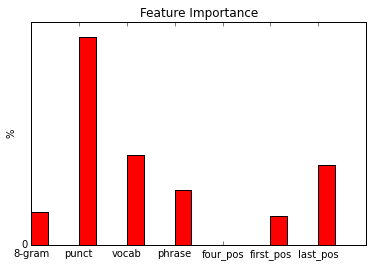

In [67]:
print 'feature importance:'

N = 7
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind,fi_dt.feature_importances_, width, color='r')

plt.ylabel('%')
plt.title('Feature Importance')
plt.xticks(ind , ('8-gram', 'punct', 'vocab', 'phrase', 'four_pos','first_pos','last_pos'))
plt.yticks(np.arange(0, 1,1))

plt.show()

Defining number of Cross Validation Folds

In [12]:
crossval = 10

In [14]:
print 'Scores of '+ str(crossval)+' CV folds and mean:'
scores = cross_validation.cross_val_score(clf, Mtrain, np.array(target), cv=crossval)
print scores
print 'Accurancy : '
print scores.mean()

Scores of 10 CV folds and mean:
[ 0.3  0.4  0.6  0.7  0.4  0.7  0.4  0.3  0.5  0.6]
Accurancy : 
0.49


## Random Forest

The number of trees in the forest.

In [29]:
trees = 100

In [68]:
print 'Fitting a Random Forest Classifier with '+str(trees)+' trees'
forest = RandomForestClassifier(n_estimators = trees)
fi = forest.fit(Mtrain, target)

Fitting a Random Forest Classifier with 100 trees


feature importance:


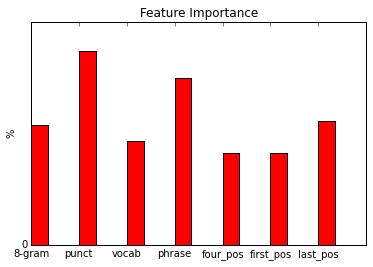

In [69]:
print 'feature importance:'

N = 7
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind,fi.feature_importances_, width, color='r')

plt.ylabel('%')
plt.title('Feature Importance')
plt.xticks(ind , ('8-gram', 'punct', 'vocab', 'phrase', 'four_pos','first_pos','last_pos'))
plt.yticks(np.arange(0, 1,1))

plt.show()

In [70]:
print 'Scores of '+ str(crossval) +' folds and mean:'
scores = cross_validation.cross_val_score(forest, Mtrain, np.array(target), cv = crossval)
print scores
print 'Accurancy : '
print scores.mean()

Scores of 10 folds and mean:
[ 0.7  0.5  0.9  0.7  0.7  0.7  0.6  0.6  0.5  0.4]
Accurancy : 
0.63


### Grid Search

In [31]:
# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [34]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 7],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [35]:
print 'running a grid search with a Random Forest Classifier with '+str(trees)+' trees...'
forest = RandomForestClassifier(n_estimators = trees)

# run grid search
grid_search = GridSearchCV(forest, param_grid=param_grid)
start = time()
grid_search.fit(Mtrain, target)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

running a grid search with a Random Forest Classifier with 100 trees...
GridSearchCV took 203.29 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.720 (std: 0.098)
Parameters: {'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 1, 'criterion': 'gini', 'max_features': 7, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.720 (std: 0.082)
Parameters: {'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 7, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.710 (std: 0.069)
Parameters: {'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 7, 'max_depth': 3}



Saving Best Model to file !

In [38]:
forest = RandomForestClassifier(n_estimators = trees, bootstrap = True, min_samples_leaf= 10, min_samples_split= 1, criterion= 'gini', max_features= 7, max_depth= None)
fi_best = forest.fit(Mtrain, target)
joblib.dump(fi_best, 'Best_RF_model.pkl',compress=9)

['Best_RF_model.pkl']

feature importance:


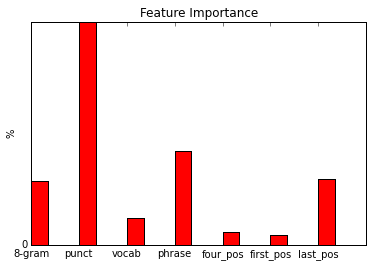

In [63]:
print 'feature importance:'

N = 7
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind,fi_best.feature_importances_, width, color='r')

plt.ylabel('%')
plt.title('Feature Importance')
plt.xticks(ind , ('8-gram', 'punct', 'vocab', 'phrase', 'four_pos','first_pos','last_pos'))
plt.yticks(np.arange(0, 1,1))

plt.show()


In [40]:
print 'Scores of '+ str(crossval) +' folds and mean:'
scores = cross_validation.cross_val_score(forest, Mtrain, np.array(target), cv = crossval)
print scores
print 'Accurancy : '
print scores.mean()

Scores of 10 folds and mean:
[ 0.7  0.4  0.7  0.8  0.7  0.8  0.7  0.7  0.5  0.6]
Accurancy : 
0.66
